In [1]:
import tensorflow as tf
import numpy as np

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2  
import os

In [4]:
model = tf.keras.models.load_model('../models/tomato_growth_stage_cnn.h5')
categories = ['Vegetative', 'Flowering', 'Immature', 'Mature-HarvestReady']


In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_growth_stage(image_path, model, categories):
    img = image.load_img(image_path, target_size=(512, 512))
    img_array = image.img_to_array(img)  
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    predictions = model.predict(img_array)
    
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = categories[predicted_class]
    
    if predicted_label == 'Mature-HarvestReady':
        harvesting_status = "Ready for Harvest"
        status_color = 'green' 
    else:
        harvesting_status = "Not Ready for Harvest"
        status_color = 'red' 
    
    return predicted_label, harvesting_status, img, status_color

In [23]:
image_path = '../test_images/0007.jpg'
result, harvesting_status, img, status_color = predict_growth_stage(image_path, model, categories)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Predicted Growth Stage: Flowering
Harvesting Status: Not Ready for Harvest


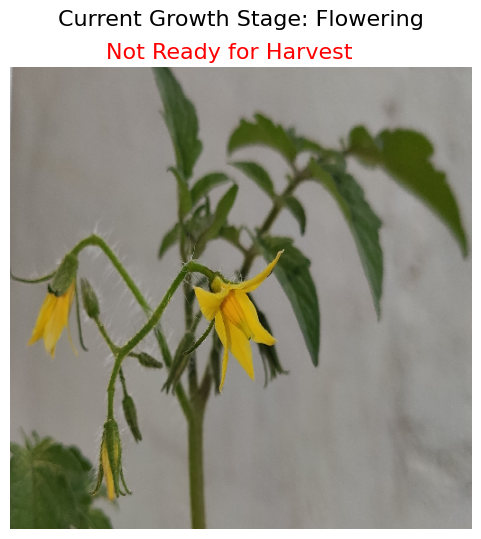

In [24]:
# Print the result
print(f"Predicted Growth Stage: {result}")
print(f"Harvesting Status: {harvesting_status}")
plt.figure(figsize=(6, 6))
plt.imshow(img) 
plt.axis('off') 
plt.title(f"Current Growth Stage: {result}", fontsize=16, pad=30)
plt.text(105.5, -10.5, harvesting_status, fontsize=16, color=status_color)

plt.show()